# 感知机算法Python复现

In [1]:
import numpy as np 
from collections import Counter
class Perceptron:
    def __init__(self,learning_rate = 0.001,iter_nums = 500,random_state=42,criterion = 'SGD') -> None:
        self.learning_rate = learning_rate ##梯度下降算法中的学习速率，默认为0.001
        self.iter_nums = iter_nums ##批量梯度下将算法中的训练次数
        self.random_state = random_state ##随机数种子，用来保证每次运行的结果一致
        self.criterion = criterion ## 优化算法，默认使用随机梯度下降算法
        
    def transform_y(self,y):  ## 将二分类中的标签向量转化为 +1，-1的形式
        label = Counter(y)
        label_lst = list(label.keys())
        if set(y) ==set([-1,1]):
            return y
        elif len(set(y))>2:
            print('该问题不是二分类问题，请重新输入数据集！')
        else:
            map = {label_lst[0]:1,label_lst[1]:-1}
            self.reverse_map = {1:label_lst[0],-1:label_lst[1]}
            y_new = [map[i] for i in y]
        return np.array(y_new)
    
    ## 获得损失函数的梯度向量    
    def get_gradient(self,X,y,w,b):
        n_samples = X.shape[0]
        gradient_w = np.zeros((1,self.n_features))
        gradient_b = np.zeros((1))
        for i in range(n_samples):
            if y[i]*(np.dot(w,X[i,:])+b)<=0:
                gradient_w = gradient_w-y[i]*X[i,:] #批量梯度下降
                gradient_b = gradient_b-y[i]
        return gradient_w,gradient_b
    def fit(self,X,y): ## 二分类问题，y的标签需要要求：正例标签为 +1 ；反例标签要求为 -1
        n_samples,self.n_features = X.shape
        y = self.transform_y(y)
        self.x = X
        self.y = y
        # 初始化参数 w
        w = np.zeros((1,self.n_features))
        b = np.zeros((1))
        
        if self.criterion =='GD':
        # GD算法更新w,b，在实际操作中并不建议使用GD方法，因为GD的计算成本很高，一般都是使用随机梯度下降
            for iter in range(self.iter_nums):
                gradient_w,gradient_b = self.get_gradient(X,y,w,b)
                w = w-self.learning_rate*gradient_w
                b = b-self.learning_rate*gradient_b
                
        # SGD算法更新w,b
        else:
            is_wrong = True
            while is_wrong:
                wrong_num = 0
                for i in range(n_samples):
                    if y[i]*(np.dot(w,X[i,:])+b)<=0:
                        w = w +self.learning_rate*y[i]*X[i,:]
                        b = b + self.learning_rate*y[i]
                        wrong_num+=1
                if wrong_num==0:
                    is_wrong =False
        self.w = w
        self.b = b
        return self.w,self.b
    
    def _predict(self,x):
        if np.dot(self.w,x)+self.b >0:
            return 1
        else:
            return -1
    def predict(self,X):
        y_pre = [self._predict(x) for x in X]
        y_pred = [self.reverse_map[i] for i in y_pre]
        return np.array(y_pred)
    
    ## 绘图（只使用于二分类数据集，且数据特征小于等于三维）
    def plot(self):
        import matplotlib.pyplot as plt
        plt.rcParams['font.sans-serif'] = ['SimHei']
        plt.rcParams['axes.unicode_minus'] = False
        if self.n_features== 2: ##如果是二维数据集
            # 如果是二维数据，那么 w.x +b =0相当于 w0*x+w1*y+b = 0,于是 y = -(w0*x+b)/w1
            plt.scatter(self.x[:,0],self.x[:,1],c=self.y) ##首先将原始数据绘成二维图
            x_min = np.min(self.x[:,0])
            x_max = np.max(self.x[:,0])
            x_range = np.arange(x_min,x_max+1)
            y_range = -(self.w[0,0]*x_range+self.b) / self.w[0,1]
            plt.plot(x_range,y_range,c='red')
            plt.savefig('Images/二维感知机示例.png')
            plt.show()
        else:
            from mpl_toolkits.mplot3d import Axes3D
            # 如果是三维数据，那么 w.x+b = 0相当于是 w0*x+w1*y+w2*z+b =0,于是z = -(w0*x+w1*y+b)/w2
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(self.x[:,0],self.x[:,1],self.x[:,2],c=self.y)
            x_min,x_max = np.min(self.x[:,0]),np.max(self.x[:,0])
            y_min,y_max = np.min(self.x[:,1]),np.max(self.x[:,1])
            x_range = np.arange(x_min,x_max+1)
            y_range = np.arange(y_min,y_max+1)
            X,Y = np.meshgrid(x_range,y_range)
            z = -(self.w[0,0]*X+self.w[0,1]*Y+self.b) / self.w[0,2]
            ax.plot_surface(X,Y,z,alpha = 0.6)         
            # 设置坐标轴标签
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            plt.savefig('Images/三维感知机示例.png')
            plt.show()

## 案例测试一（二维线性可分二分类数据集）

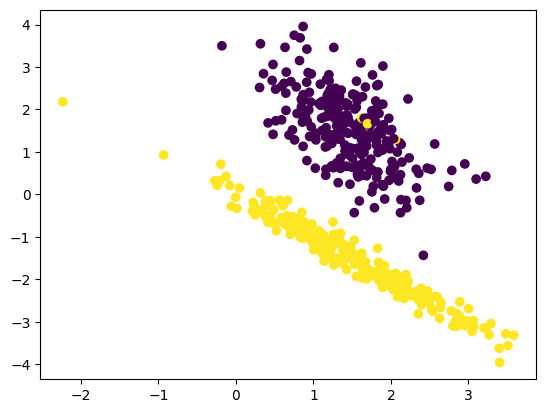

In [2]:
## 案例测试一
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
# 生成线性可分的二分类数据
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1, class_sep=1.5)
# 将数据集可视化
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

[[-0.00372965 -0.00451693]] [0.003]


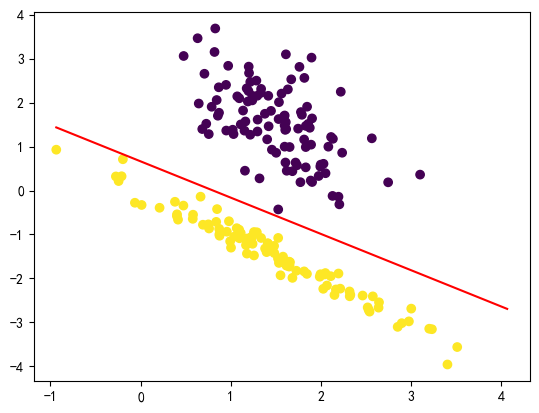

In [3]:
demo = Perceptron(criterion='SGD')
w,b = demo.fit(X[:200,:],y[:200])
print(w,b)
X_test = X[200:,:]
y_test = y[200:]
y_pre = demo.predict(X_test)
demo.plot()

## 案例二：三维线性可分二分类数据集

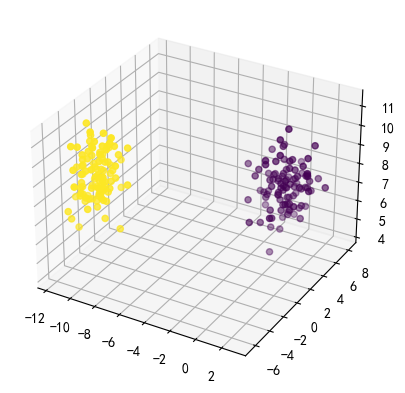

In [88]:
# 生成线性可分（三维）的二分类数据
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=200,n_features=3,centers=2,random_state=14)
# 将数据集可视化
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1],X[:,2], c=y)
plt.show()

[[-0.0099997  -0.00856302 -0.00217128]] [0.]


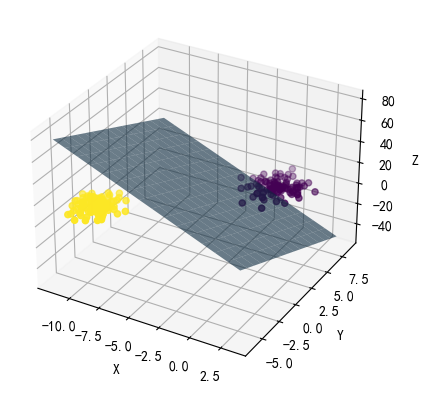

In [91]:
demo1 = Perceptron(criterion='SGD')
# X = np.array([[1, 2, 3], [2, 3, 4], [4, 5, 6], [5, 6, 7]])
# y = np.array([1, 1, -1, -1])
w,b=demo1.fit(X,y)
print(w,b)
demo1.plot()